In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Read & view the Dataset
day = pd.read_csv('C:\\Users\\rakes\\OneDrive\\Documents\\BikeSharingAssignmentData\\day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Understanding the type of Data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
day = day.drop(['instant','dteday'],axis =1)

In [5]:
season_desc = pd.get_dummies(day['season'])
season_desc.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [6]:
season_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    uint8
 1   2       730 non-null    uint8
 2   3       730 non-null    uint8
 3   4       730 non-null    uint8
dtypes: uint8(4)
memory usage: 3.0 KB


In [7]:
#df.rename(columns = d, inplace = False)
season_desc1 = season_desc.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc1.sample(5)

,spring,summer,fall,winter
3,1,0,0,0
644,0,0,0,1
630,0,0,0,1
650,0,0,0,1
464,0,1,0,0


In [8]:
day = pd.concat((day,season_desc1),axis=1)

In [9]:
day = day.drop(['season','spring'],axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
182,0,7,0,6,0,1,30.271653,33.36540,44.4583,7.709154,2204,2915,5119,0,1,0
19,0,1,0,4,1,2,10.728347,12.75250,53.8333,13.125568,83,1844,1927,0,0,0
159,0,6,0,4,1,2,33.141653,37.87895,56.8333,10.042161,563,3352,3915,1,0,0
38,0,2,0,2,1,1,9.054153,9.91230,53.7917,24.250650,64,1466,1530,0,0,0
7,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,0,0,0


In [10]:
Month = pd.get_dummies(day['mnth'])
Month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
Month1 = Month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
Month1.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
274,0,0,0,0,0,0,0,0,0,1,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,1,0,0,0,0,0
210,0,0,0,0,0,0,1,0,0,0,0,0
355,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
day = pd.concat((day,Month1),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
9,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,...,0,0,0,0,0,0,0,0,0,0
290,0,10,0,2,1,2,21.832500,26.13605,70.1667,7.375829,...,0,0,0,0,0,0,0,1,0,0
252,0,9,0,6,0,1,27.060000,30.39810,75.3750,10.291736,...,0,0,0,0,0,0,1,0,0,0
288,0,10,0,0,0,1,20.978347,25.15770,48.6667,18.875039,...,0,0,0,0,0,0,0,1,0,0
259,0,9,0,6,0,2,20.158347,23.92560,71.8333,12.708225,...,0,0,0,0,0,0,1,0,0,0


In [13]:
day = day.drop(['mnth','Jan'],axis=1)

In [14]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    uint8  
 13  fall        730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  March       730 non-null    uint8  
 17  April       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  June        730 non-null    u

In [15]:
Weekday = pd.get_dummies(day['weekday'])
Weekday.sample(5)

,0,1,2,3,4,5,6
289,0,1,0,0,0,0,0
197,1,0,0,0,0,0,0
270,0,0,0,1,0,0,0
367,0,0,1,0,0,0,0
43,1,0,0,0,0,0,0


In [16]:
WEEKDAYS = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
WEEKDAYS.sample(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
163,0,1,0,0,0,0,0
382,0,0,0,1,0,0,0
246,1,0,0,0,0,0,0
57,1,0,0,0,0,0,0
635,0,0,0,0,0,1,0
410,0,0,0,1,0,0,0
229,0,0,0,0,1,0,0


In [17]:
day = pd.concat((day,WEEKDAYS),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
139,0,0,5,1,1,22.003347,26.45210,71.9583,8.375871,909,...,0,0,0,0,0,0,0,0,1,0
256,0,0,3,1,1,27.606653,31.34500,69.7083,11.209100,647,...,0,0,0,0,0,0,1,0,0,0
27,0,0,5,1,2,8.342598,11.16585,79.3043,8.261100,38,...,0,0,0,0,0,0,0,0,1,0
336,0,0,6,0,1,12.265847,15.53020,61.2917,6.417481,706,...,0,0,1,0,0,0,0,0,0,1
496,1,0,6,0,1,23.130847,27.24085,48.0417,8.249911,2622,...,0,0,0,0,0,0,0,0,0,1


In [18]:
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
386,1,0,0,2,6.662500,8.11250,79.6250,13.375746,196,1781,...,0,0,0,0,0,0,0,0,0,0
511,1,0,0,1,28.290000,32.07125,69.7083,14.416457,3283,3308,...,0,0,0,0,0,0,0,0,0,0
378,1,0,0,1,7.380000,9.15435,45.7500,12.541261,333,2160,...,0,0,0,0,0,0,0,0,0,1
697,1,0,1,1,11.515670,14.92110,55.5652,7.739974,243,5080,...,0,0,1,0,0,0,0,1,0,0
321,0,0,1,1,11.240847,13.63605,41.0000,11.291711,245,3147,...,0,0,1,0,0,0,0,0,1,0


In [19]:
Weathersit = pd.get_dummies(day['weathersit'])
Weathersit.sample(5)

,1,2,3
144,1,0,0
646,0,1,0
146,1,0,0
446,0,1,0
521,1,0,0


In [20]:
Weathersits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)

In [21]:
day = pd.concat((day,Weathersits), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
630,1,0,0,1,21.695847,25.94665,46.7083,14.958286,2454,5453,...,0,0,0,0,0,0,0,1,0,0
632,1,0,1,1,22.550000,27.20895,57.0000,15.833507,845,6693,...,0,0,1,0,0,0,0,1,0,0
230,0,0,1,2,28.085000,31.66105,72.2917,9.333636,797,3356,...,0,0,0,0,0,1,0,0,1,0
686,1,0,0,1,14.042500,16.88730,69.2917,15.250004,922,3747,...,0,0,0,0,0,0,0,1,0,0
489,1,0,0,2,25.488347,29.23040,75.6667,10.250464,2496,4387,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# Removing the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)

In [23]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  April       730 non-null    uint8  
 16  May         730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  Aug         730 non-null    u

In [24]:
# Visualization of Data Statistics 
day.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1).set_precision(2)


,count,mean,std,min,25%,50%,75%,max
yr,730.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
holiday,730.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,730.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,730.00,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.00,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.00,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.00,12.76,5.20,1.50,9.04,12.13,15.63,34.00
casual,730.00,849.25,686.48,2.00,316.25,717.00,1096.50,3410.00
registered,730.00,3658.76,1559.76,20.00,2502.25,3664.50,4783.25,6946.00
cnt,730.00,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00


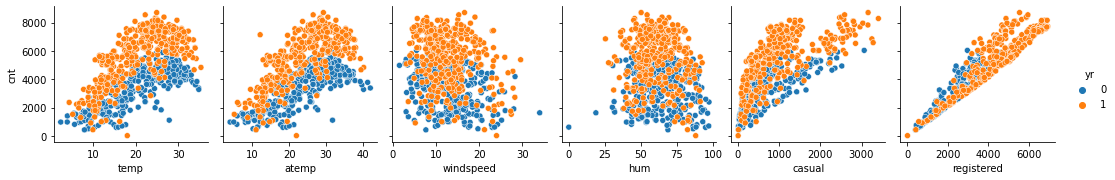

In [25]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

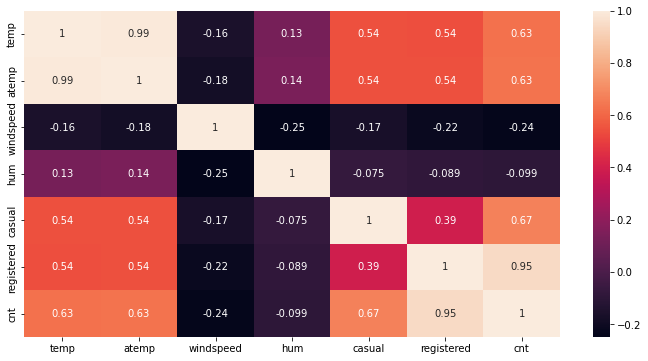

In [26]:
plt.figure(figsize = (12,6))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

In [27]:
day = day.drop(['atemp','casual','registered'],axis =1)

In [28]:
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

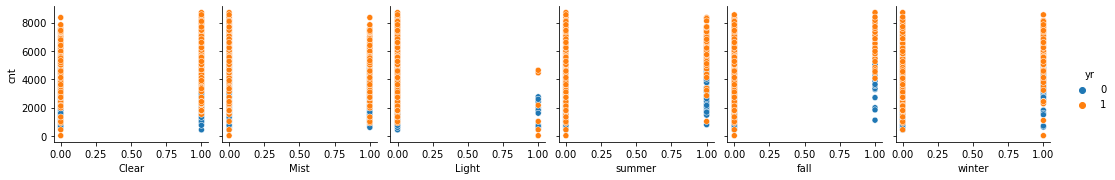

In [29]:
sns.pairplot(day,x_vars =['Clear', 'Mist','Light','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

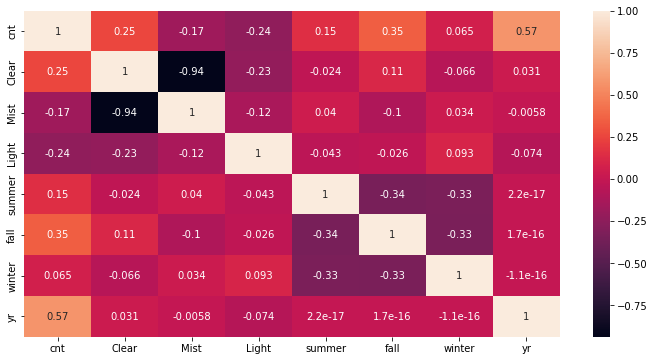

In [30]:
plt.figure(figsize = (12,6))
sns.heatmap(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True)
plt.show()

In [31]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

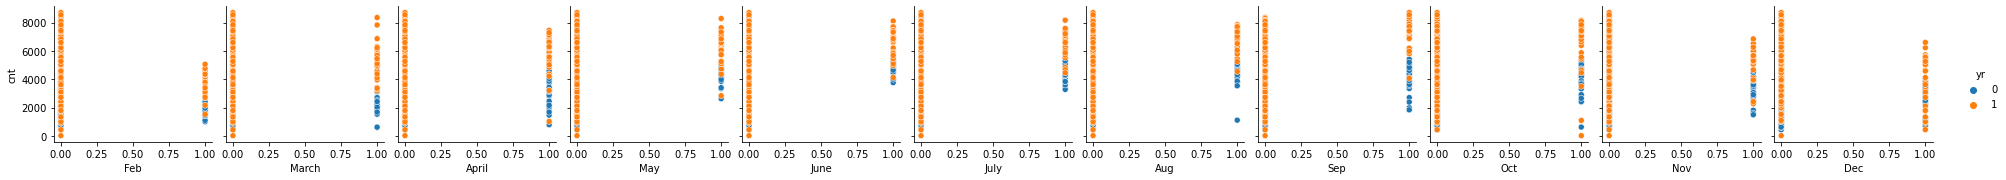

In [32]:
sns.pairplot(day,x_vars =['Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr')
plt.show()

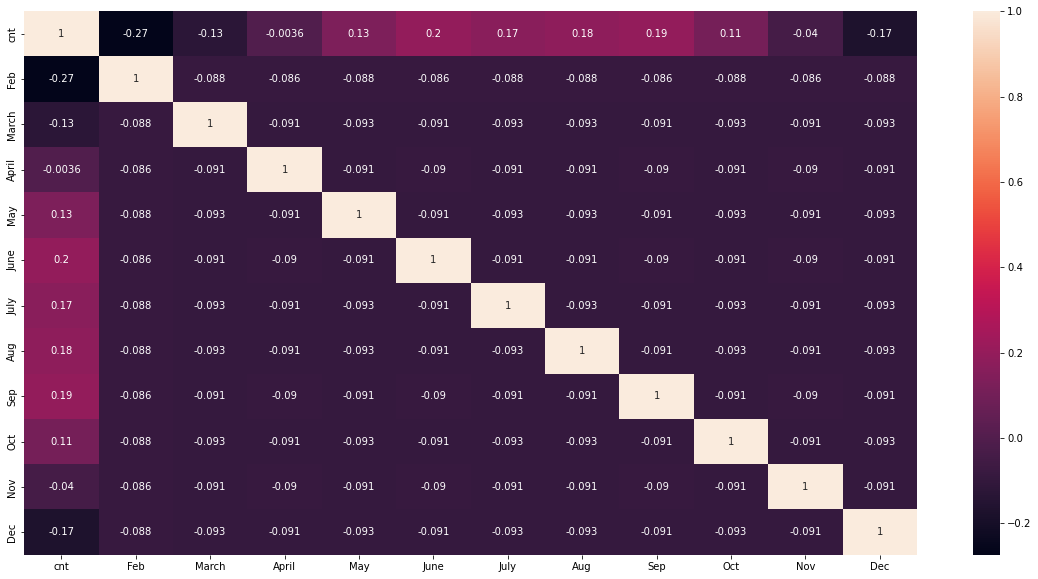

In [33]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

In [34]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [36]:
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

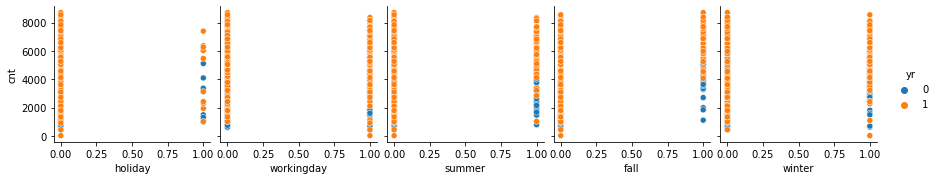

In [37]:
sns.pairplot(day,x_vars =['holiday', 'workingday','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

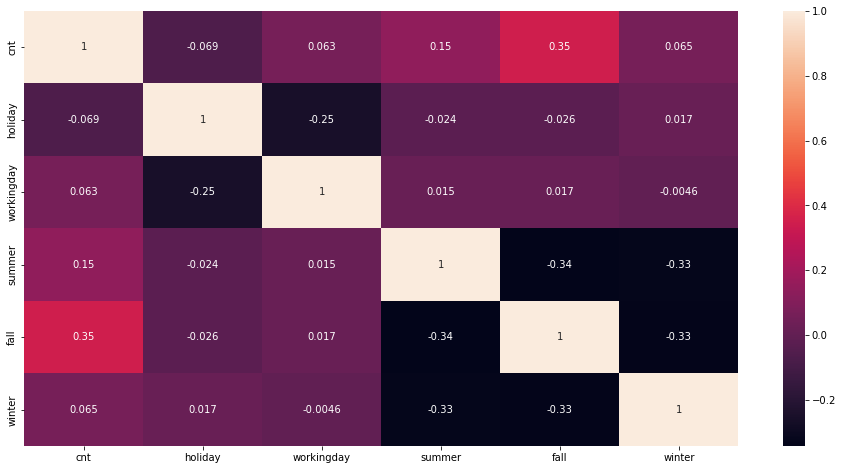

In [38]:
plt.figure(figsize = (16,8))
sns.heatmap(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True)
plt.show()

In [39]:
# Splitting the Data: Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [40]:
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


In [41]:
# Preparation for Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


516    0.472273
314    0.384952
176    0.607800
92     0.371261
511    0.755752
Name: cnt, dtype: float64

In [42]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('March', False, 3),
 ('April', False, 5),
 ('May', False, 4),
 ('June', False, 6),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Monday', False, 11),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Thrusday', False, 15),
 ('Friday', False, 13),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [44]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [45]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday'],
      dtype='object')

In [46]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [47]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        09:21:48   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
11,Oct,1.49
9,Aug,1.46


In [49]:
# As VIF is Inf for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Mist', 'Light'],
      dtype='object')

In [50]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        09:22:52   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light         -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
13,Mist,1.56
11,Oct,1.49
9,Aug,1.46
7,summer,1.38


In [52]:
X_train_rfe.shape

(510, 15)

In [53]:
# Calculation of Error 
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

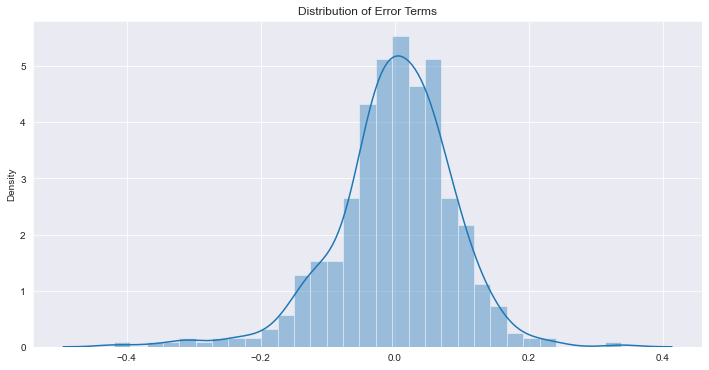

In [54]:
# Ploting Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

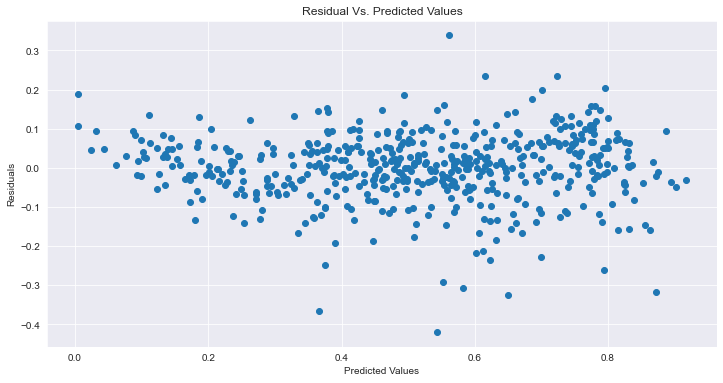

In [55]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

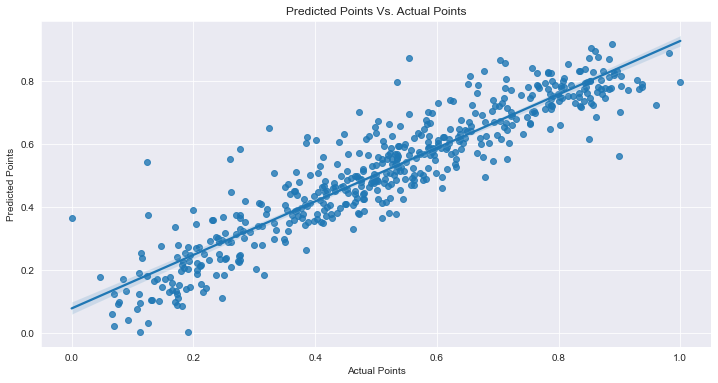

In [56]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

In [57]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [58]:
#Removing the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'],axis=1)

# Predict the Price for Test Data using the Trained Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

722    0.372136
717    0.617205
684    0.648437
640    0.831284
325    0.163424
dtype: float64

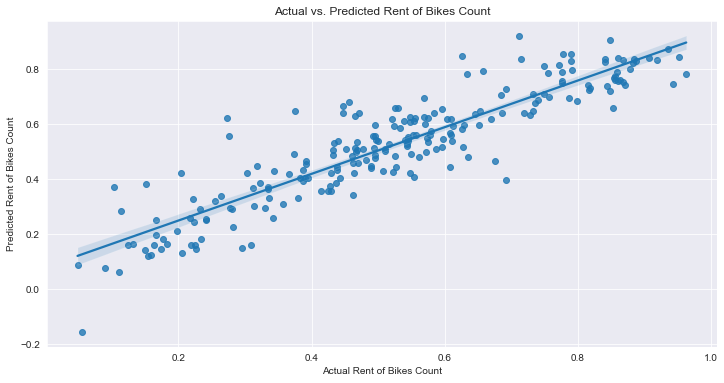

In [59]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [60]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8149002944843474

In [61]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.53
yr            0.23
const         0.19
winter        0.13
Sep           0.13
summer        0.10
Aug           0.06
Saturday      0.05
workingday    0.04
Oct           0.04
holiday      -0.06
Mist         -0.06
hum          -0.17
windspeed    -0.19
Light        -0.25
dtype: float64

In [62]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.23 * yr + 0.19 * const + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct + -0.06 * holiday + -0.06 * Mist + -0.17 * hum + -0.19 * windspeed + -0.25 * Light + 